In [1]:
print("Beckham change!")

Beckham change!


In [14]:
import gymnasium as gym
import os
import ale_py
import numpy as np
import random
import matplotlib.pyplot as plt

In [6]:
env = gym.make("ALE/Frogger-v5")
observation, info=env.reset()

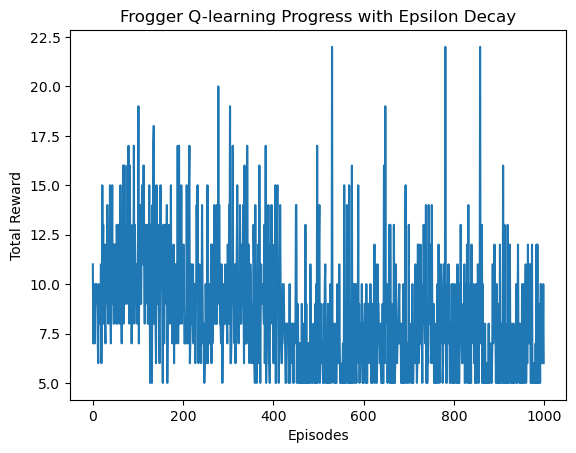

In [15]:
#Experiment with this dont be scared to try new things!
# Define Q-learning parameters
alpha = 0.7  # Learning rate
gamma = 0.75 # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.99  # Decay factor per episode
num_episodes = 1000  

# Initialize Q-table
state_size = 255  # Approximate number of states
action_size = env.action_space.n  # Number of actions
Q_table = np.zeros((state_size, action_size))

def get_state(observation):
    """Convert observation into a discrete state."""
    return hash(str(observation)) % state_size  # Simple hashing approach

def get_custom_reward(observation, reward, action):
    """Modify the reward based on game conditions."""
    frog_x, frog_y = observation[0], observation[1]  # Example frog position
    
    if is_goal_reached(frog_y):  
        return 200  # Goal reached
    if is_hit_by_car(observation):
        return -50  # Collision
    if is_in_water(observation):
        return -20  # Fell in water
    if action == 0:  # Moving forward
        return 1
    if action == 1:  # Moving backward
        return -1
    if action == 4:  # Staying still
        return -2
    return reward  # Default to original environment reward

# Checking the frog's state.
def is_goal_reached(frog_y):
    """Check if Frogger reached the top (goal)."""
    return frog_y == 0 

def is_hit_by_car(observation):
    """Check if Frogger got hit by a car."""
    return observation[2] == 1

def is_in_water(observation):
    """Check if Frogger fell into water."""
    return observation[3] == 1


rewards_per_episode = []  # Track rewards

# Training loop
for episode in range(num_episodes):
    observation, info = env.reset()
    state = get_state(observation)
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy action selection with decay
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q_table[state])  # Exploit

        new_observation, reward, done, _, _ = env.step(action)
        new_state = get_state(new_observation)
        total_reward += reward

        # Q-learning update
        Q_table[state, action] += alpha * (
            reward + gamma * np.max(Q_table[new_state]) - Q_table[state, action]
        )

        state = new_state  # Move to next state

    rewards_per_episode.append(total_reward)  # Track progress

    # Apply epsilon decay
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

env.close()

# Plot learning progress
plt.plot(rewards_per_episode)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Frogger Q-learning Progress with Epsilon Decay")
plt.show()